### PYDICOM - DICOM2NIFTI - NILEARN - NIBABEL

#### CONVERTIR DE DICOM A NIFTI

In [33]:
# Instalamos la librería dicom2nifti
!pip install dicom2nifti


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Importamos la librería
import dicom2nifti

# Ruta del directorio que contiene los archivos DICOM
dicom_directory = r"C:\Users\M413UA\Documents\ISABELLA\Catedra\Info\Info-2\Unidad_3\Datos"

# Ruta donde se guardarán los archivos NIfTI
nifti_output_directory = r"C:\Users\M413UA\Documents\ISABELLA\Catedra\Info\Info-2\Unidad_3\Datos_nifti"

# Función para la conversión de formato
dicom2nifti.convert_directory(dicom_directory,nifti_output_directory)

# Guardamos la ruta de la imagen en una variable
image=r'C:\Users\M413UA\Documents\ISABELLA\Catedra\Info\Info-2\Unidad_3\Datos_nifti\2_lung_30__b70f.nii.gz'

### EJERCICIO

Cree una clase llamada DicomFile que facilite la manipulación de archivos DICOM. 

La clase debe permitirle obtener información como el nombre del paciente y la descripción del estudio. También deber permitir la  visualización de la imagen en tres planos anatómicos y mostrar información sobre el tamaño de la imagen y la cantidad de cortes en cada plano. 

In [41]:
# Importamos las librerías

import pydicom
from nilearn import plotting
import matplotlib.pyplot as plt
import nibabel as nib

### Recordemos como acceder a un archivo dicom

Usamos la librería pydicom
1. Debemos cargar la imagen dicom [.dcm]
2. Visualicemos la información que contiene esa imagen
3. Filtremos por nombre de etiqueta para acceder a la información que nos interesa

In [44]:
# Creamos una variable con el directorio de la imagen
dicom_file_path = r'Datos\000000.dcm'

# Leo la imagen dicom
dicom_data = pydicom.dcmread(dicom_file_path)

# Para filtrar
dicom_data.dir()

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionNumber',
 'AcquisitionTime',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'CTDIvol',
 'ClinicalTrialTimePointDescription',
 'ClinicalTrialTimePointID',
 'Columns',
 'ContentDate',
 'ContentTime',
 'ConvolutionKernel',
 'DataCollectionDiameter',
 'DateOfLastCalibration',
 'DeidentificationMethod',
 'DeidentificationMethodCodeSequence',
 'DistanceSourceToDetector',
 'DistanceSourceToPatient',
 'EstimatedDoseSaving',
 'EthnicGroup',
 'Exposure',
 'ExposureModulationType',
 'ExposureTime',
 'FilterType',
 'FocalSpots',
 'FrameOfReferenceUID',
 'GantryDetectorTilt',
 'GeneratorPower',
 'HighBit',
 'ImageComments',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'InstanceNumber',
 'KVP',
 'LargestImagePixelValue',
 'LongitudinalTemporalInformationModified',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientIdentityRemoved',
 'PatientName',
 'Pati

#### Clase DicomFile

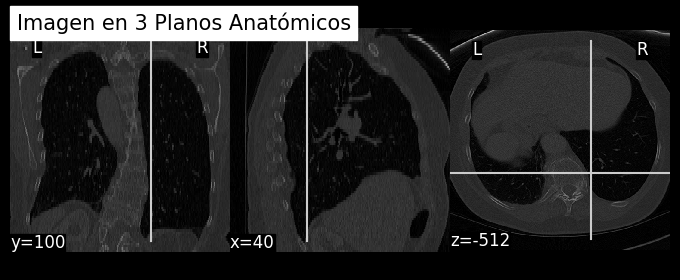

Tamaño de la imagen: (512, 512)
Cantidad de cortes (axial, sagital, coronal): 99, 512, 512
Nombre del paciente: C3N-00247
Descripción del estudio: CT CHEST W IV CONTRAST


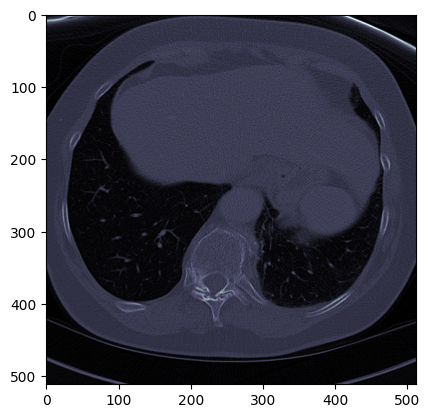

In [35]:
class DicomFile:
    # Creo el constructor
    def __init__(self, file_path):
        self.file_path = file_path
        self.dicom_data = pydicom.dcmread(file_path)
    # Métodos
    def get_patient_name(self):
        return self.dicom_data['PatientName'].value
        
    def get_study_description(self):
        return self.dicom_data.StudyDescription
    
    def show_in_three_planes(self,image):

        # Mostrar la imagen en los tres planos anatómicos
        plotting.plot_anat(image, display_mode='ortho', title='Imagen en 3 Planos Anatómicos',cut_coords=(40, 100, -512))
        plt.show()

    def get_image_data(self):
        # Obtener datos de pixeles para graficar con matplotlib 
        return self.dicom_data.pixel_array
    
    def get_size_image(self,image):
        
        nifti_data = nib.load(image)
        tamaño_imagen = nifti_data.shape[:2]
        cantidad_axial = nifti_data.shape[2]
        cantidad_sagital = nifti_data.shape[0]
        cantidad_coronal = nifti_data.shape[1]

        print(f'Tamaño de la imagen: {tamaño_imagen}')
        print(f'Cantidad de cortes (axial, sagital, coronal): {cantidad_axial}, {cantidad_sagital}, {cantidad_coronal}')

    
# Uso la clase DicomFile
dicom_file = DicomFile(dicom_file_path)

patient_name = dicom_file.get_patient_name()
study_description = dicom_file.get_study_description()
dicom_file.show_in_three_planes(image)
image_data = dicom_file.get_image_data()
dicom_file.get_size_image(image)

print(f'Nombre del paciente: {patient_name}')
print(f'Descripción del estudio: {study_description}')

plt.imshow(image_data, cmap=plt.cm.bone)
plt.show()